In [12]:
 import numpy as np
 import pandas as pd

  

In [13]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [15]:
df=pd.read_csv('cleaned_all_phones.csv')

In [16]:
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [17]:
df.tail()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,2023-08-18,190.0,...,True,False,False,True,False,False,False,False,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,2023-08-23,190.0,...,True,False,False,True,False,False,False,False,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,2023-08-28,205.0,...,True,True,False,False,True,False,False,False,False,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,2023-08-28,205.0,...,True,True,False,False,True,False,False,False,False,470.000
1511,vivo iQOO Z7 Pro,Vivo,Android 13,6.78,1080x2400,4600,Li-Po,8,2023-08-31,175.0,...,True,True,False,True,False,False,False,False,False,287.988


In [18]:
df.sample(10)

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
1240,Reno8 Z,Oppo,Android 12,6.43,1080x2400,4500,Li-Po,8,2022-08-04,181.0,...,True,False,False,True,False,True,False,False,False,999.00
1020,Find N,Oppo,Android 11,7.10,1792x1920,4500,Li-Po,8,2021-12-15,275.0,...,True,True,False,True,True,True,True,False,False,380.00
1227,Galaxy M13 5G,Samsung,Android 12,6.50,720x1600,5000,Li-Po,6,2022-07-14,195.0,...,True,False,False,True,False,False,False,False,False,207.05
1244,Galaxy Z Fold4,Samsung,Android 12L,7.60,1812x2176,4400,Li-Po,12,2022-08-10,263.0,...,True,True,True,True,True,True,True,False,True,1179.00
745,Reno5 4G,Oppo,Android 11,6.40,1080x2400,4310,Li-Po,8,2020-12-31,171.0,...,True,True,False,True,True,False,False,True,True,240.00
1298,Pixel 7,Google,Android 13,6.30,1080x2400,4355,Li-Ion,8,2022-10-06,197.0,...,True,True,False,True,True,True,True,False,False,463.00
407,A5 (2020),Oppo,Android 9.0,6.50,720x1600,5000,Li-Po,4,2019-09-21,195.0,...,True,True,False,True,False,False,False,False,False,210.00
1375,GT Neo 5,Realme,Android 13,6.74,1240x2772,5000,Li-Po,8,2023-02-09,199.0,...,True,True,False,False,True,False,False,False,False,340.00
90,Aristo 2,LG,Android 7.1.2,5.00,720x1280,2410,Li-Ion,2,2018-01-01,139.0,...,True,False,False,True,False,False,False,False,False,200.00
6,P10 Lite,Huawei,Android 7.0,5.20,1080x1920,3000,Li-Po,4,2017-02-01,146.0,...,True,False,False,True,False,False,False,False,False,420.00


In [19]:
df.shape

(1512, 22)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

In [20]:
df.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [26]:
df.mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2080\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


inches             6.422460
battery         4389.798942
ram(GB)            6.683862
weight(g)        187.636243
storage(GB)      109.164683
video_720p         0.539683
video_1080p        0.994048
video_4K           0.529762
video_8K           0.056878
video_30fps        0.891534
video_60fps        0.374339
video_120fps       0.271164
video_240fps       0.133598
video_480fps       0.023148
video_960fps       0.146825
price(USD)       337.847036
dtype: float64

df.duplicated().sum()

In [21]:
df.duplicated().sum()

0

In [22]:
df.isna().sum()

phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
video_720p           0
video_1080p          0
video_4K             0
video_8K             0
video_30fps          0
video_60fps          0
video_120fps         0
video_240fps         0
video_480fps         0
video_960fps         0
price(USD)           0
dtype: int64

In [23]:
df.columns


Index(['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery',
       'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)',
       'storage(GB)', 'video_720p', 'video_1080p', 'video_4K', 'video_8K',
       'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps',
       'video_480fps', 'video_960fps', 'price(USD)'],
      dtype='object')

In [24]:
df['width'] = [int(i.split('x')[0] )for i in df['resolution']]
df['height'] = [int(i.split('x')[1] )for i in df['resolution']]

In [25]:
print(df)

            phone_name   brand           os  inches resolution  battery  \
0         Y6II Compact  Huawei  Android 5.1    5.00   720x1280     2200   
1             K20 plus      LG  Android 7.0    5.30   720x1280     2700   
2       P8 Lite (2017)  Huawei  Android 7.0    5.20  1080x1920     3000   
3         Redmi Note 4  Xiaomi  Android 6.0    5.50  1080x1920     4100   
4                  P10  Huawei  Android 7.0    5.10  1080x1920     3200   
...                ...     ...          ...     ...        ...      ...   
1507         vivo Y77t    Vivo   Android 13    6.64  1080x2388     5000   
1508               11x  Realme   Android 13    6.72  1080x2400     5000   
1509               GT5  Realme   Android 13    6.74  1240x2772     5240   
1510          GT5 240W  Realme   Android 13    6.74  1240x2772     4600   
1511  vivo iQOO Z7 Pro    Vivo   Android 13    6.78  1080x2400     4600   

     battery_type  ram(GB) announcement_date  weight(g)  ...  video_8K  \
0           Li-Po        

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])
df['battery_type'] = le.fit_transform(df['battery_type'])
df['os'] = le.fit_transform(df['os'])

In [27]:
bool_col = [col for col in df.columns if df[col].dtype == 'bool']
df[bool_col] = df[bool_col].astype(int)

In [28]:
df['announcement_date'] = pd.to_datetime(df['announcement_date'])
df['year'] = df['announcement_date'].dt.year

In [29]:
camera = [ x for x in df.columns if 'video' in x]
df['camera_score'] = df[camera].sum(axis=1)

In [30]:
df.columns

Index(['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery',
       'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)',
       'storage(GB)', 'video_720p', 'video_1080p', 'video_4K', 'video_8K',
       'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps',
       'video_480fps', 'video_960fps', 'price(USD)', 'width', 'height', 'year',
       'camera_score'],
      dtype='object')

In [31]:
df = df.drop(['phone_name','announcement_date','resolution'], axis = 1)

In [32]:
df.info

<bound method DataFrame.info of       brand  os  inches  battery  battery_type  ram(GB)  weight(g)  \
0         3   8    5.00     2200             1        2      140.0   
1         4  12    5.30     2700             0        2      140.0   
2         3  12    5.20     3000             0        4      147.0   
3        12  10    5.50     4100             1        4      165.0   
4         3  12    5.10     3200             0        4      145.0   
...     ...  ..     ...      ...           ...      ...        ...   
1507     11   7    6.64     5000             1        8      190.0   
1508      8   7    6.72     5000             1        8      190.0   
1509      8   7    6.74     5240             1       16      205.0   
1510      8   7    6.74     4600             1       24      205.0   
1511     11   7    6.78     4600             1        8      175.0   

      storage(GB)  video_720p  video_1080p  ...  video_60fps  video_120fps  \
0              16           1            0  ...  

<Axes: >

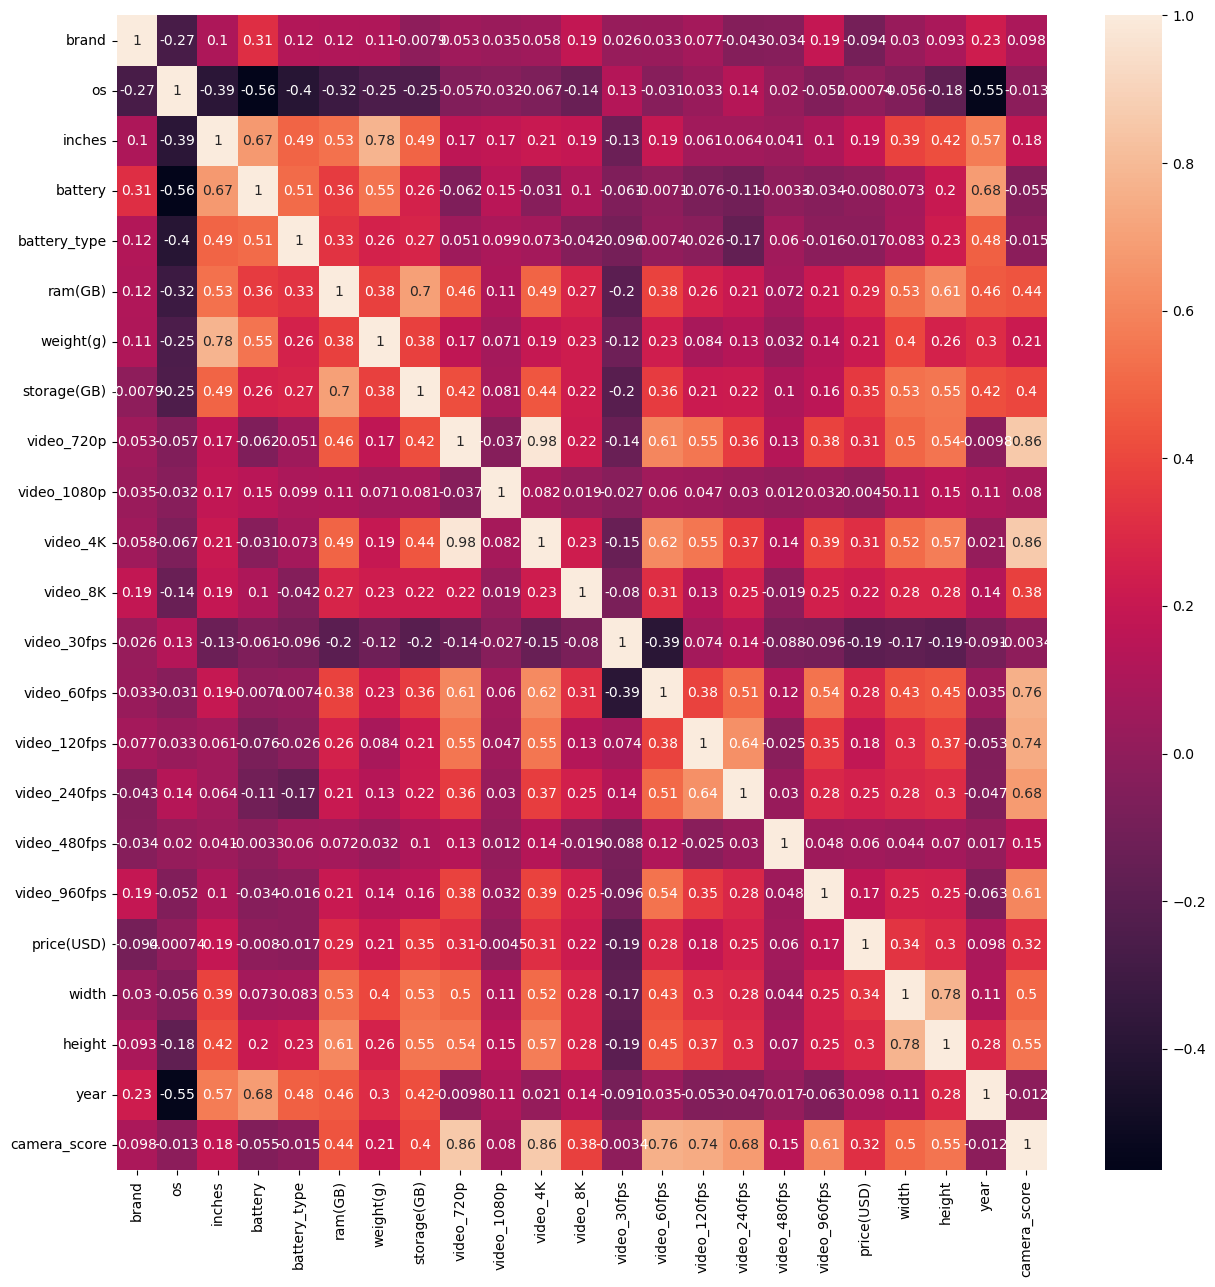

In [33]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)b

In [34]:
X = df.drop(['price(USD)'], axis = 1)
y = df['price(USD)']

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(xtrain, ytrain)
rf_pred = rf.predict(xtest)
mean_absolute_error(ytest, rf_pred)

151.5563600022002

In [38]:
df['price(USD)'].mean()

337.8470357142857

In [39]:
df_imp = pd.DataFrame({'feature': X.columns,'importance':rf.feature_importances_})
df_imp.sort_values(by = 'importance', ascending = False)

,feature,importance
6,weight(g),0.223234
19,height,0.108108
18,width,0.086569
2,inches,0.083979
0,brand,0.076388
1,os,0.063082
3,battery,0.061603
20,year,0.048615
5,ram(GB),0.044008
21,camera_score,0.040559


In [41]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate = 0.003 ,random_state = 42, n_estimators = 500, objective = 'reg:squarederror')
xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)
mean_absolute_error(ytest, xgb_pred)

143.93672510813093

In [43]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(n_estimators=700, random_state=42, loss_function= 'MAE', eval_metric='MAE')
cat.fit(xtrain, ytrain)
cat_pred = cat.predict(xtest)
mean_absolute_error(ytest, cat_pred)

0:	learn: 162.1420765	total: 140ms	remaining: 1m 38s
1:	learn: 161.0559802	total: 145ms	remaining: 50.7s
2:	learn: 160.1554618	total: 150ms	remaining: 34.8s
3:	learn: 159.1893740	total: 154ms	remaining: 26.8s
4:	learn: 157.9615920	total: 159ms	remaining: 22.1s
5:	learn: 156.8883084	total: 163ms	remaining: 18.9s
6:	learn: 156.0109385	total: 168ms	remaining: 16.6s
7:	learn: 154.9937422	total: 172ms	remaining: 14.9s
8:	learn: 153.9446383	total: 177ms	remaining: 13.6s
9:	learn: 152.9918757	total: 182ms	remaining: 12.5s
10:	learn: 152.0905187	total: 187ms	remaining: 11.7s
11:	learn: 151.2461858	total: 191ms	remaining: 11s
12:	learn: 150.4724296	total: 196ms	remaining: 10.3s
13:	learn: 149.5345114	total: 200ms	remaining: 9.81s
14:	learn: 148.8092379	total: 205ms	remaining: 9.35s
15:	learn: 148.1041508	total: 209ms	remaining: 8.95s
16:	learn: 147.4496211	total: 214ms	remaining: 8.61s
17:	learn: 146.8246255	total: 219ms	remaining: 8.28s
18:	learn: 146.1817072	total: 223ms	remaining: 8s
19:	lea

124.02927789796067

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=500, loss='absolute_error', random_state=42, learning_rate=0.1)
gbr.fit(xtrain, ytrain)
gbr_pred = gbr.predict(xtest)
mean_absolute_error(ytest, gbr_pred)

125.6503280349779

In [46]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=700, random_state=42)
lgbm.fit(xtrain, ytrain)
lgbm_pred = lgbm.predict(xtest)
mean_absolute_error(ytest, lgbm_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 1209, number of used features: 21
[LightGBM] [Info] Start training from score 338.214126


171.2538961834737

In [47]:
pred_df = pd.DataFrame({'actual price':ytest,'random forest': rf_pred,'XGBoost': xgb_pred,'catboost': cat_pred,'gradient boosting': gbr_pred, 'lightgbm': lgbm_pred})
pred_df.head(10)

,actual price,random forest,XGBoost,catboost,gradient boosting,lightgbm
907,499.00,279.465600,328.997528,262.536339,285.976889,155.245178
617,470.00,593.850440,325.890045,424.464423,386.265878,743.134586
1386,130.27,172.668120,233.738144,162.381978,186.261771,90.421889
941,660.00,479.024640,530.395447,452.735092,495.440163,368.842231
303,260.00,396.568000,383.633240,290.220603,266.884653,393.652624
1479,180.00,209.376482,272.093842,213.299883,236.936057,198.236400
175,460.00,258.460000,263.683807,177.507883,207.690496,221.079333
342,280.00,647.293900,374.346558,265.718732,246.024123,787.446367
1308,204.24,308.698800,339.568939,259.612565,290.427707,282.739793
1229,339.00,331.295913,348.165161,292.719537,298.259578,243.884222
